In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.min_rows', 500)  
pd.set_option('display.max_rows', 500)

#got here: https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
players = pd.read_csv('all_players.csv')

players.head()
rows = len(players.axes[0])
cols = len(players.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)
players.columns

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,RdA,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season
0,Roy Lassiter,TB,F,30,30,2580,27,4,76,49,...,2,0.14,20,39,70,2,0,64.47,1996,reg
1,Raul Diaz Arce,DC,F,28,28,2351,23,2,100,49,...,2,0.08,32,26,35,6,1,49.00,1996,reg
2,Eduardo Hurtado,LA,F,26,26,2323,21,7,87,56,...,3,0.27,48,26,25,5,0,64.37,1996,reg
3,Preki,KC,M,32,32,2880,18,13,140,61,...,4,0.41,26,44,7,3,0,43.57,1996,reg
4,Brian McBride,CLB,F,28,28,2307,17,3,79,44,...,1,0.12,21,46,10,0,0,55.70,1996,reg


Number of Rows:  15767
Number of Columns:  28


Index(['Player', 'Club', 'POS', 'GP', 'GS', 'MINS', 'G', 'A', 'SHTS', 'SOG',
       'GWG', 'PKG/A', 'HmG', 'RdG', 'G/90min', 'SC%', 'GWA', 'HmA', 'RdA',
       'A/90min', 'FC', 'FS', 'OFF', 'YC', 'RC', 'SOG%', 'Year', 'Season'],
      dtype='object')

In [17]:
players_sj = players[(players['Club'].str.strip() == 'SJ') & (players['Year'] >= 2000) & (players['Season'] == 'reg')]
players_sj.head()

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,RdA,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season
1208,Abdul Thompson Conteh,SJ,F,31,27,2356,8,3,71,41,...,0,0.11,49,64,33,2,0,57.75,2000,reg
1225,Dario Brose,SJ,M,28,21,2088,5,4,63,27,...,0,0.17,39,35,0,5,0,42.86,2000,reg
1228,Wojtek Krakowiak,SJ,M,24,11,1282,5,0,21,11,...,0,0.00,37,22,6,4,0,52.38,2000,reg
1238,John Doyle,SJ,D,20,20,1776,4,2,20,11,...,1,0.10,41,19,5,3,1,55.00,2000,reg
1240,Ronald Cerritos,SJ,F,9,9,850,4,1,30,16,...,0,0.11,6,11,21,0,0,53.33,2000,reg


<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 12 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

Text(0.5, 0, 'Season')

Text(0, 0.5, 'Goals Scored')

Text(0.5, 1.0, 'Top San Jose Earthquakes Goalscorers by Season (2000+)')

(array([1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

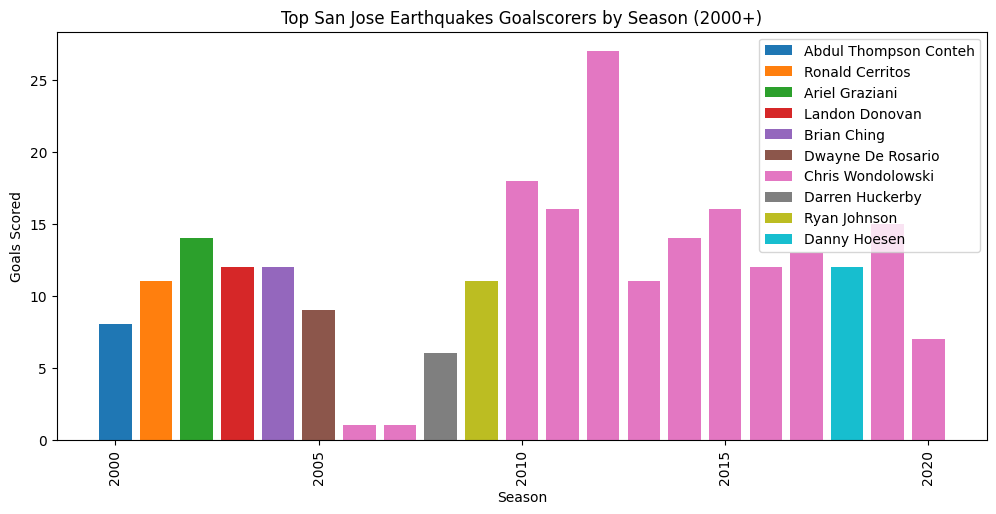

In [21]:
players_sj = players[(players['Club'].str.strip() == 'SJ') & (players['Year'] >= 2000) & (players['Season'] == 'reg')]

# group by season and select the player with the most goals
top_scorers = players_sj.sort_values(['Year', 'G'], ascending=[True, False]).groupby('Year').first().reset_index()

# columns i want to plot
cols = ['Player', 'Year', 'G']
top_scorer_stats = top_scorers[cols]

# store players in dictionary, to assign colors for graph
player_colors = {player: f'C{i}' for i, player in enumerate(top_scorer_stats['Player'].unique())}

fig, ax = plt.subplots(figsize=(12, 6))

# plotting here
for player, color in player_colors.items():
    player_data = top_scorer_stats[top_scorer_stats['Player'] == player]
    ax.bar(player_data['Year'], player_data['G'], color=color, label=player)

ax.set_xlabel('Season')
ax.set_ylabel('Goals Scored')
ax.set_title('Top San Jose Earthquakes Goalscorers by Season (2000+)')
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
# Adjust spacing and show the plot
plt.subplots_adjust(bottom=0.2)
plt.show()